<a href="https://colab.research.google.com/github/WKPJ23/UK-MRP-2024/blob/main/Synthetic_Voter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

# Define parameters
n = 5000
sex = ['Male', 'Female']
age_groups = ['18-29', '30-44', '45-59', '60-75', '76+']
ethnicity = ['White', 'Black', 'East-Indian', 'Asian', 'Latino', 'Mixed', 'Other']
sexual_orientation = ['Gay', 'Bisexual', 'Straight', 'Other']
religion = ['Christian', 'Muslim', 'Jewish', 'Buddhist', 'Hindu', 'Atheist', 'Other']
counties = [
    'ABERDEENSHIRE', 'ANGUS & KINCARDINESHIRE', 'ANTRIM', 'ARGYLL', 'ARMAGH', 'AVON',
    'AYRSHIRE, WIGTOWNSHIRE & KIRKCUDBRIGHTSHIRE', 'BEDFORDSHIRE', 'BERKSHIRE',
    'BERWICKSHIRE, ROXBURGHSHIRE & EAST LOTHIAN', 'BUCKINGHAMSHIRE', 'CAMBRIDGESHIRE',
    'CHESHIRE', 'CLEVELAND', 'CLWYD', 'CORNWALL', 'COUNTY DURHAM', 'CUMBRIA & ISLE OF MAN',
    'DERBYSHIRE', 'DEVON', 'DORSET', 'DOWN', 'DUMFRIESSHIRE, PEEBLESSHIRE & SELKIRKSHIRE',
    'DUNBARTONSHIRE', 'DURHAM', 'DYFED', 'EAST SUSSEX', 'EAST YORKSHIRE & HUMBERSIDE', 'ESSEX',
    'FERMANAGH & TYRONE', 'FIFE', 'GLOUCESTERSHIRE', 'GREATER LONDON', 'GREATER MANCHESTER',
    'GWENT', 'GWYNEDD', 'HAMPSHIRE & ISLE OF WIGHT', 'HEREFORDSHIRE & WORCESTERSHIRE',
    'HERTFORDSHIRE', 'INVERNESS-SHIRE & BANFFSHIRE', 'KENT', 'LANARKSHIRE', 'LANCASHIRE',
    'LEICESTERSHIRE', 'LINCOLNSHIRE', 'LONDONDERRY', 'LOTHIAN', 'MERSEYSIDE', 'MID GLAMORGAN',
    'MIDDLESEX', 'MIDLOTHIAN', 'MORAYSHIRE', 'NORFOLK', 'NORTH YORKSHIRE', 'NORTHAMPTONSHIRE',
    'NORTHUMBERLAND', 'NOTTINGHAMSHIRE', 'OXFORDSHIRE', 'PERTHSHIRE & CLACKMANNANSHIRE', 'POWYS',
    'RENFREWSHIRE', 'ROSS-SHIRE, SUTHERLAND, CAITHNESS, LEWIS, ORKNEY & SHETLAND', 'RUTLAND',
    'SHROPSHIRE', 'SOMERSET', 'SOUTH GLAMORGAN', 'SOUTH YORKSHIRE', 'STAFFORDSHIRE',
    'STIRLINGSHIRE', 'SUFFOLK', 'SURREY', 'TYNE AND WEAR', 'WARWICKSHIRE', 'WEST GLAMORGAN',
    'WEST LOTHIAN', 'WEST MIDLANDS', 'WEST SUSSEX', 'WEST YORKSHIRE', 'WILTS'
]
education = ["Some Secondary School", "Secondary School", "Some Post-Secondary", "Post-Secondary", "Graduate"]
party_affiliation = ["Conservative", "Labour", "Liberal Democrat", "Green", "Reform UK"]
last_voted_for = ['Tory McToryson', 'Labour MacLabby', 'Libby Demo', 'Grass Grayson', 'Fascist McAsshole']

# County Populations
county_pop = {
    'ABERDEENSHIRE': 261470, 'ANGUS & KINCARDINESHIRE': 116200, 'ANTRIM': 618108,
    'ARGYLL': 86500, 'ARMAGH': 174792, 'AVON': 1050000, 'AYRSHIRE, WIGTOWNSHIRE & KIRKCUDBRIGHTSHIRE': 367650,
    'BEDFORDSHIRE': 669338, 'BERKSHIRE': 911403, 'BERWICKSHIRE, ROXBURGHSHIRE & EAST LOTHIAN': 151730,
    'BUCKINGHAMSHIRE': 808666, 'CAMBRIDGESHIRE': 856429, 'CHESHIRE': 1033521, 'CLEVELAND': 569500,
    'CLWYD': 380200, 'CORNWALL': 568210, 'COUNTY DURHAM': 530094, 'CUMBRIA & ISLE OF MAN': 498888,
    'DERBYSHIRE': 1059145, 'DEVON': 795286, 'DORSET': 772268, 'DOWN': 535300,
    'DUMFRIESSHIRE, PEEBLESSHIRE & SELKIRKSHIRE': 149220, 'DUNBARTONSHIRE': 95250, 'DURHAM': 530094,
    'DYFED': 390400, 'EAST SUSSEX': 558973, 'EAST YORKSHIRE & HUMBERSIDE': 601635, 'ESSEX': 1868113,
    'FERMANAGH & TYRONE': 215500, 'FIFE': 371910, 'GLOUCESTERSHIRE': 633558, 'GREATER LONDON': 8961989,
    'GREATER MANCHESTER': 2817000, 'GWENT': 472100, 'GWYNEDD': 124178, 'HAMPSHIRE & ISLE OF WIGHT': 1347850,
    'HEREFORDSHIRE & WORCESTERSHIRE': 800000, 'HERTFORDSHIRE': 1229521, 'INVERNESS-SHIRE & BANFFSHIRE': 235540,
    'KENT': 1846000, 'LANARKSHIRE': 1098000, 'LANCASHIRE': 1485700, 'LEICESTERSHIRE': 1043000,
    'LINCOLNSHIRE': 751500, 'LONDONDERRY': 151300, 'LOTHIAN': 900000, 'MERSEYSIDE': 1442500,
    'MID GLAMORGAN': 405100, 'MIDDLESEX': 1812300, 'MIDLOTHIAN': 91650, 'MORAYSHIRE': 95270,
    'NORFOLK': 903680, 'NORTH YORKSHIRE': 824610, 'NORTHAMPTONSHIRE': 747622, 'NORTHUMBERLAND': 322120,
    'NOTTINGHAMSHIRE': 1143000, 'OXFORDSHIRE': 691667, 'PERTHSHIRE & CLACKMANNANSHIRE': 150600, 'POWYS': 132705,
    'RENFREWSHIRE': 176830, 'ROSS-SHIRE, SUTHERLAND, CAITHNESS, LEWIS, ORKNEY & SHETLAND': 71000, 'RUTLAND': 39200,
    'SHROPSHIRE': 320274, 'SOMERSET': 965424, 'SOUTH GLAMORGAN': 481082, 'SOUTH YORKSHIRE': 1415000,
    'STAFFORDSHIRE': 1131800, 'STIRLINGSHIRE': 94450, 'SUFFOLK': 761360, 'SURREY': 1185000, 'TYNE AND WEAR': 1128000,
    'WARWICKSHIRE': 576900, 'WEST GLAMORGAN': 396600, 'WEST LOTHIAN': 183100, 'WEST MIDLANDS': 2900000,
    'WEST SUSSEX': 863980, 'WEST YORKSHIRE': 2320000, 'WILTS': 720000
}

# Sum pop. count
total_pop = sum(county_pop.values())

# Calculate probabilities that person appears in population based off sampling
county_probability = {county: count/total_pop for county, count in county_pop.items()}
probabilities = [county_probability[county] for county in counties]

# Define conditional probabilities for party affiliation based on demographics
conditional_probs = pd.DataFrame({
    #Sex
    'Male': [0.3, 0.2, 0.15, 0.15, 0.2],
    'Female': [0.3, 0.3, 0.15, 0.15, 0.1],
    #Sexual Orientation
    'Gay': [0.05, 0.3, 0.6, 0.04, 0.01],
    'Bisexual': [0.05, 0.3, 0.6, 0.04, 0.01],
    'Straight': [0.4, 0.3, 0.1, 0.1, 0.1],
    'Other': [0.05, 0.3, 0.6, 0.04, 0.01],
    #Ethnicity
    'White': [0.3, 0.2, 0.1, 0.1, 0.3],
    'Black': [0.1, 0.4, 0.4, 0.05, 0.05],
    'East-Indian': [0.3, 0.45, 0.1, 0.1, 0.05],
    'Asian': [0.4, 0.45, 0.05, 0.05, 0.05],
    'Latino': [0.2, 0.55, 0.1, 0.1, 0.05],
    'Mixed': [0.2, 0.55, 0.1, 0.1, 0.05],
    'Other': [0.05, 0.3, 0.6, 0.04, 0.01],
    #Religion
    'Christian': [0.5, 0.2, 0.05, 0.05, 0.2],
    'Muslim': [0.35, 0.4, 0.1, 0.1, 0.05],
    'Jewish': [0.3, 0.5, 0.1, 0.05, 0.05],
    'Buddhist': [0.05, 0.3, 0.1, 0.5, 0.05],
    'Hindu': [0.1, 0.3, 0.15, 0.4, 0.05],
    'Atheist': [0.1, 0.3, 0.3, 0.2, 0.1],
    'Other': [0.25, 0.25, 0.2, 0.2, 0.1],
    #Education
    "Some Secondary School": [0.5, 0.15, 0.05, 0.05, 0.3],
    "Secondary School": [0.4, 0.25, 0.1, 0.1, 0.2],
    "Some Post-Secondary": [0.25, 0.35, 0.15, 0.15, 0.1],
    "Post-Secondary": [0.15, 0.4, 0.2, 0.2, 0.05],
    "Graduate": [0.05, 0.4, 0.25, 0.25, 0.05],
    #Age Group
    '18-29': [0.1, 0.2, 0.5, 0.15, 0.05],
    '30-44': [0.1, 0.3, 0.4, 0.1, 0.1],
    '45-59': [0.2, 0.3, 0.2, 0.1, 0.2],
    '60-75': [0.4, 0.2, 0.05, 0.05, 0.3],
    '76+': [0.5, 0.1, 0.05, 0.05, 0.3],
})

# Normalize the columns to ensure they sum to 1
conditional_probs = conditional_probs.div(conditional_probs.sum(axis=0), axis=1)

# Function to sample party affiliation based on demographics
def sample_party_affiliation(demographic_value, category):

    # Check if demographic_value exists in the DataFrame columns
    if demographic_value not in conditional_probs.columns:
        demographic_value = 'Other_' + category  # Default to 'Other' if not found

    # Get the probabilities
    probabilities = conditional_probs[demographic_value]

    # Debugging information
    # print(f"Demographic: {demographic_value}, Probabilities: {probabilities.values}, Sum: {probabilities.sum()}")

    # Ensure probabilities sum to 1 before sampling
    if not np.isclose(probabilities.sum(), 1):
        raise ValueError(f"Probabilities for {demographic_value} do not sum to 1.")

    return np.random.choice(party_affiliation, p=probabilities)

# Generate ages using a normal distribution
mean_age = 45
std_dev_age = 25
age = np.random.normal(mean_age, std_dev_age, n)
age = np.clip(age, 18, 90).astype(int)

# Define age groups and their corresponding bins
age_bins = [18, 30, 45, 60, 76, 91]
age_labels = ['18-29', '30-44', '45-59', '60-75', '76+']

# Create the DataFrame
UK_Voter_Breakdown = pd.DataFrame({
    'Sex': np.random.choice(sex, size=n, p=[0.45, 0.55]),
    'Age': age,
    'Age_Group': pd.cut(age, bins=age_bins, labels=age_labels, right=False),
    'Ethnic_Background': np.random.choice(ethnicity, size=n, p=[0.55, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05]),
    'Sexual_Orientation': np.random.choice(sexual_orientation, size=n, p=[0.1, 0.05, 0.8, 0.05]),
    'Religion': np.random.choice(religion, size=n, p=[0.35, 0.2, 0.05, 0.05, 0.1, 0.2, 0.05]),
    'Registered_County': np.random.choice(counties, size=n, p=probabilities),
    'Education': np.random.choice(education, size=n, p=[0.25, 0.3, 0.15, 0.2, 0.1]),
    'Party_Affiliation': np.random.choice(party_affiliation, size=n, p=[0.3, 0.3, 0.15, 0.15, 0.1]),
    'Previous_Vote': np.random.choice(last_voted_for, size=n, p=[0.3, 0.3, 0.15, 0.15, 0.1]),
})

# Calculate year of birth given current year
current_year = 2024
UK_Voter_Breakdown.insert(3, "Year of Birth", current_year - age)

# Apply the function to assign party affiliation based on multiple demographics
UK_Voter_Breakdown['Party_Affiliation'] = UK_Voter_Breakdown.apply(lambda row: sample_party_affiliation(row['Sex'], 'Sex'), axis=1)
UK_Voter_Breakdown['Party_Affiliation'] = UK_Voter_Breakdown.apply(lambda row: sample_party_affiliation(row['Age_Group'], 'Age_Group'), axis=1)
UK_Voter_Breakdown['Party_Affiliation'] = UK_Voter_Breakdown.apply(lambda row: sample_party_affiliation(row['Ethnic_Background'], 'Ethnic_Background'), axis=1)
UK_Voter_Breakdown['Party_Affiliation'] = UK_Voter_Breakdown.apply(lambda row: sample_party_affiliation(row['Sexual_Orientation'], 'Sexual_Orientation'), axis=1)
UK_Voter_Breakdown['Party_Affiliation'] = UK_Voter_Breakdown.apply(lambda row: sample_party_affiliation(row['Religion'], 'Religion'), axis=1)
UK_Voter_Breakdown['Party_Affiliation'] = UK_Voter_Breakdown.apply(lambda row: sample_party_affiliation(row['Education'], 'Education'), axis=1)

# Estbalish how likely a person is to vote for a certain candidate based on probable party affiliation
likely_party_vote = pd.DataFrame({
    'Tory McToryson': [0.75, 0.01, 0.01, 0.01, 0.22],
    'Labour MacLabby': [0.04, 0.7, 0.15, 0.1, 0.01],
    'Libby Demo': [0.09, 0.1, 0.7, 0.1, 0.01],
    'Grass Grayson': [0.01, 0.08, 0.1, 0.8, 0.01],
    'Fascist McAsshole': [0.1, 0.03, 0.01, 0.01, 0.85],
}, index=party_affiliation)

# Normalize the rows to ensure they sum to 1
likely_party_vote = likely_party_vote.div(likely_party_vote.sum(axis=1), axis=0)

# Function to sample based on party affiliation
def sample_previous_vote(party):
    probabilities = likely_party_vote.loc[party].values
    return np.random.choice(last_voted_for, p=probabilities)

# Apply the function to each row in the DataFrame
UK_Voter_Breakdown['Previous_Vote'] = UK_Voter_Breakdown['Party_Affiliation'].apply(sample_previous_vote)

display(UK_Voter_Breakdown)

,Sex,Age,Age_Group,Year of Birth,Ethnic_Background,Sexual_Orientation,Religion,Registered_County,Education,Party_Affiliation,Previous_Vote
0,Male,53,45-59,1971,White,Straight,Christian,HEREFORDSHIRE & WORCESTERSHIRE,Post-Secondary,Labour,Labour MacLabby
1,Male,44,30-44,1980,Black,Straight,Muslim,"AYRSHIRE, WIGTOWNSHIRE & KIRKCUDBRIGHTSHIRE",Secondary School,Green,Grass Grayson
2,Male,47,45-59,1977,Latino,Gay,Muslim,GREATER MANCHESTER,Post-Secondary,Liberal Democrat,Libby Demo
3,Male,18,18-29,2006,Asian,Straight,Muslim,DERBYSHIRE,Some Secondary School,Green,Grass Grayson
4,Male,76,76+,1948,Black,Straight,Hindu,GREATER LONDON,Secondary School,Labour,Labour MacLabby
...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,53,45-59,1971,White,Straight,Muslim,BERKSHIRE,Some Post-Secondary,Labour,Grass Grayson
4996,Female,52,45-59,1972,East-Indian,Straight,Muslim,SOUTH YORKSHIRE,Graduate,Labour,Labour MacLabby
4997,Male,32,30-44,1992,East-Indian,Straight,Atheist,SOUTH YORKSHIRE,Post-Secondary,Conservative,Tory McToryson
4998,Male,39,30-44,1985,White,Straight,Christian,GREATER LONDON,Secondary School,Conservative,Tory McToryson


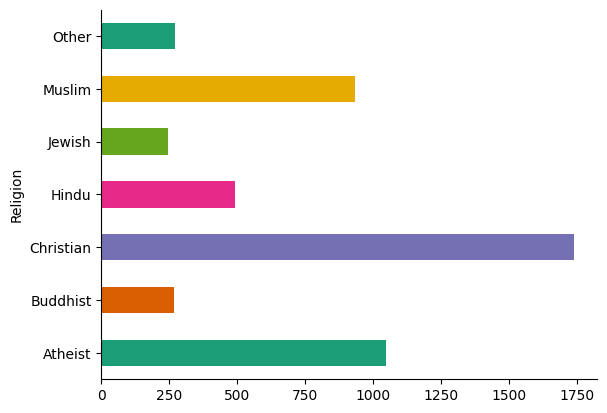

In [ ]:
# @title Religion

from matplotlib import pyplot as plt
import seaborn as sns
UK_Voter_Breakdown.groupby('Religion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

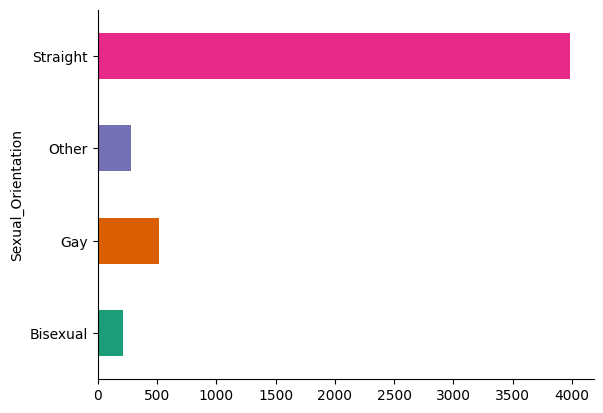

In [ ]:
# @title Sexual_Orientation

from matplotlib import pyplot as plt
import seaborn as sns
UK_Voter_Breakdown.groupby('Sexual_Orientation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import files
UK_Voter_Breakdown.to_csv('Synthetic_Voter_Data.csv', index=False)
files.download("Synthetic_Voter_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

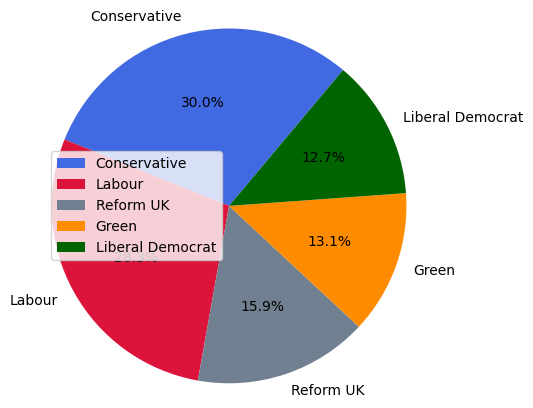

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the totals for each party
party_counts = UK_Voter_Breakdown['Party_Affiliation'].value_counts()

# Define labels and slices based on the DataFrame totals
Candidate_Share = party_counts.index.tolist()
slices = party_counts.values.tolist()

# Define colors for each label (make sure the number of colors matches the number of labels)
colors = ['royalblue', 'crimson', 'slategray', 'darkorange', 'darkgreen']

# Plotting the pie chart
plt.pie(slices, labels=Candidate_Share, colors=colors,
        startangle=50, shadow=False, explode=(0, 0, 0, 0, 0),
        radius=1.2, autopct='%1.1f%%')

# Plotting legend
plt.legend(loc=0)

# Showing the plot
plt.show()